In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import warnings
warnings.filterwarnings("ignore")
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
sns.set(style='darkgrid')
np.random.seed(123)

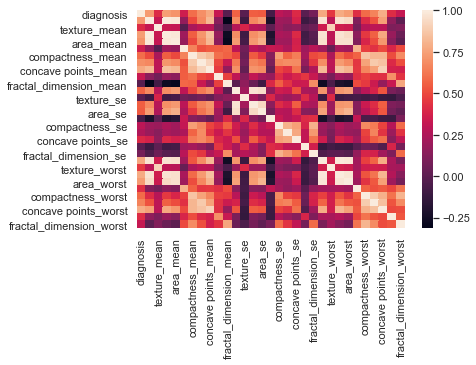

In [11]:
data = pd.read_csv('data.csv')
data = data.iloc[:,1:-1]
label_encoder = LabelEncoder()
data.iloc[:,0] = label_encoder.fit_transform(data.iloc[:,0]).astype('float64')
corr = data.corr()
sns.heatmap(corr)
columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False

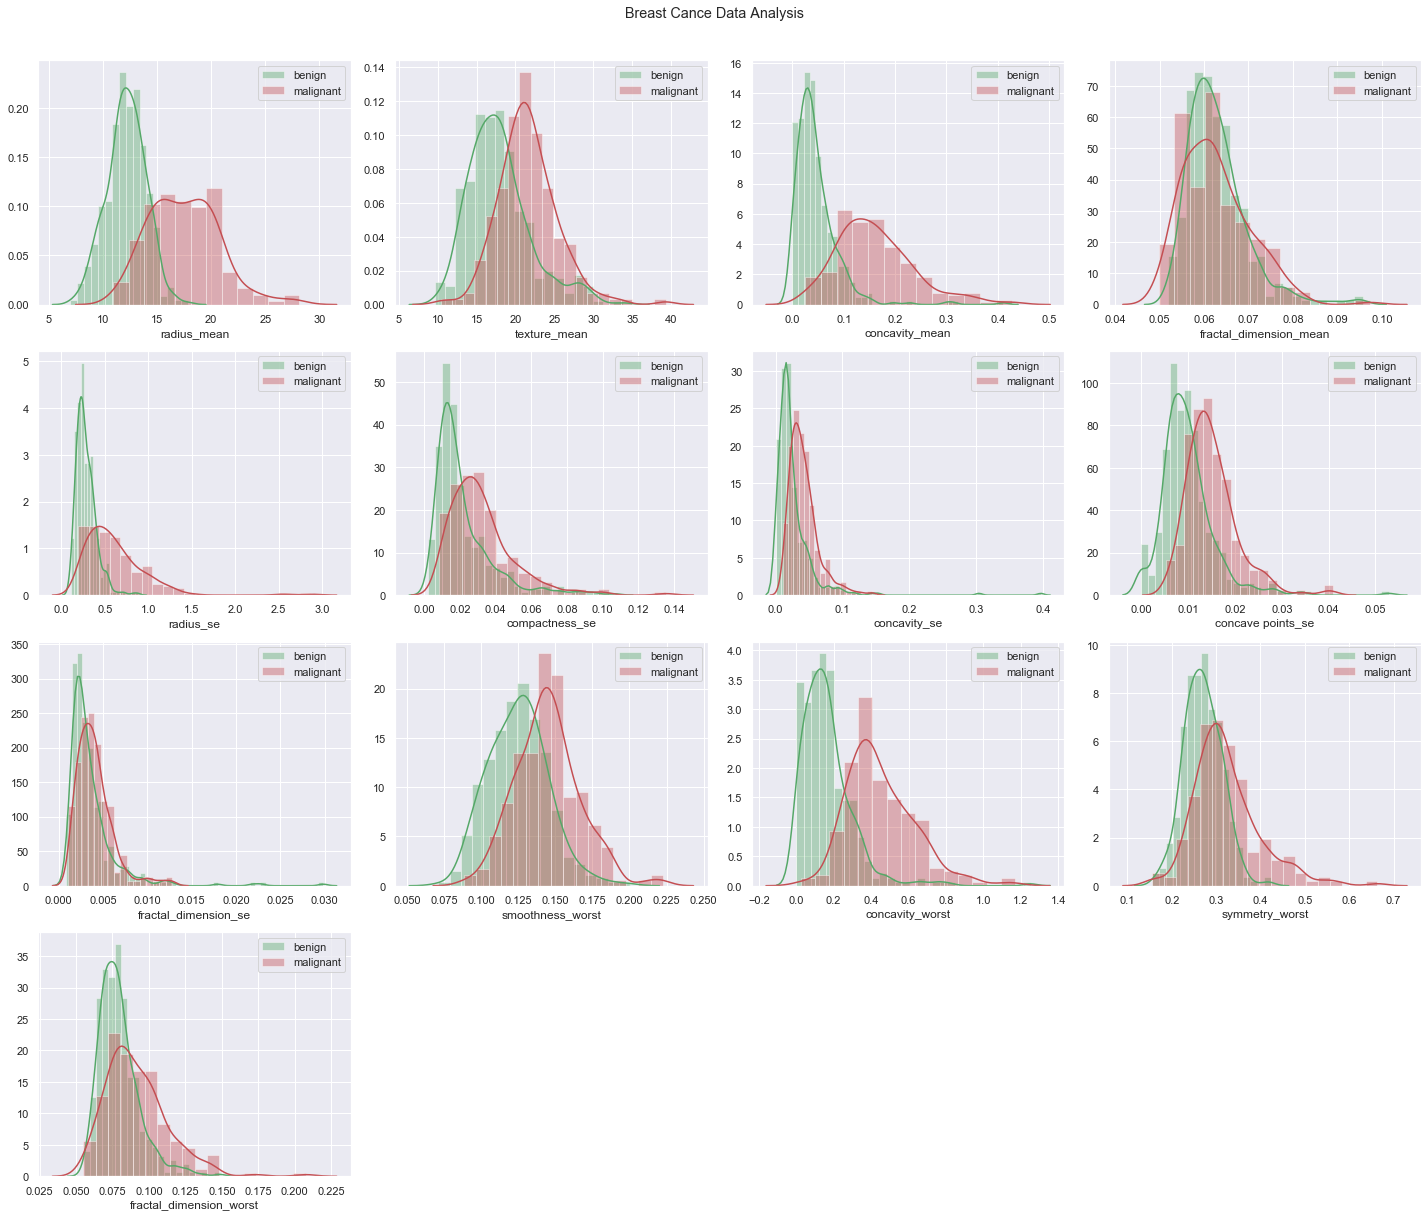

In [12]:
selected_columns = data.columns[columns]
data = data[selected_columns]
selected_columns = selected_columns[1:].values


def backwardElimination(x, Y, sl, columns):
    numVars = len(x[0])
    for i in range(0, numVars):
        regressor_OLS = sm.OLS(Y, x).fit()
        maxVar = max(regressor_OLS.pvalues).astype(float)
        if maxVar > sl:
            for j in range(0, numVars - i):
                if (regressor_OLS.pvalues[j].astype(float) == maxVar):
                    x = np.delete(x, j, 1)
                    columns = np.delete(columns, j)
                    
    regressor_OLS.summary()
    return x, columns
SL = 0.05
data_modeled, selected_columns = backwardElimination(data.iloc[:,1:].values, data.iloc[:,0].values, SL, selected_columns)
result = pd.DataFrame()
result['diagnosis'] = data.iloc[:,0]
data = pd.DataFrame(data = data_modeled, columns = selected_columns)
fig = plt.figure(figsize = (20, 25))
j = 0
for i in data.columns:
    plt.subplot(6, 4,j+1)
    j += 1
    sns.distplot(data[i][result['diagnosis']==0], color='g', label = 'benign')
    sns.distplot(data[i][result['diagnosis']==1], color='r', label = 'malignant')
    plt.legend(loc='best')
fig.suptitle('Breast Cance Data Analysis')
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.show()

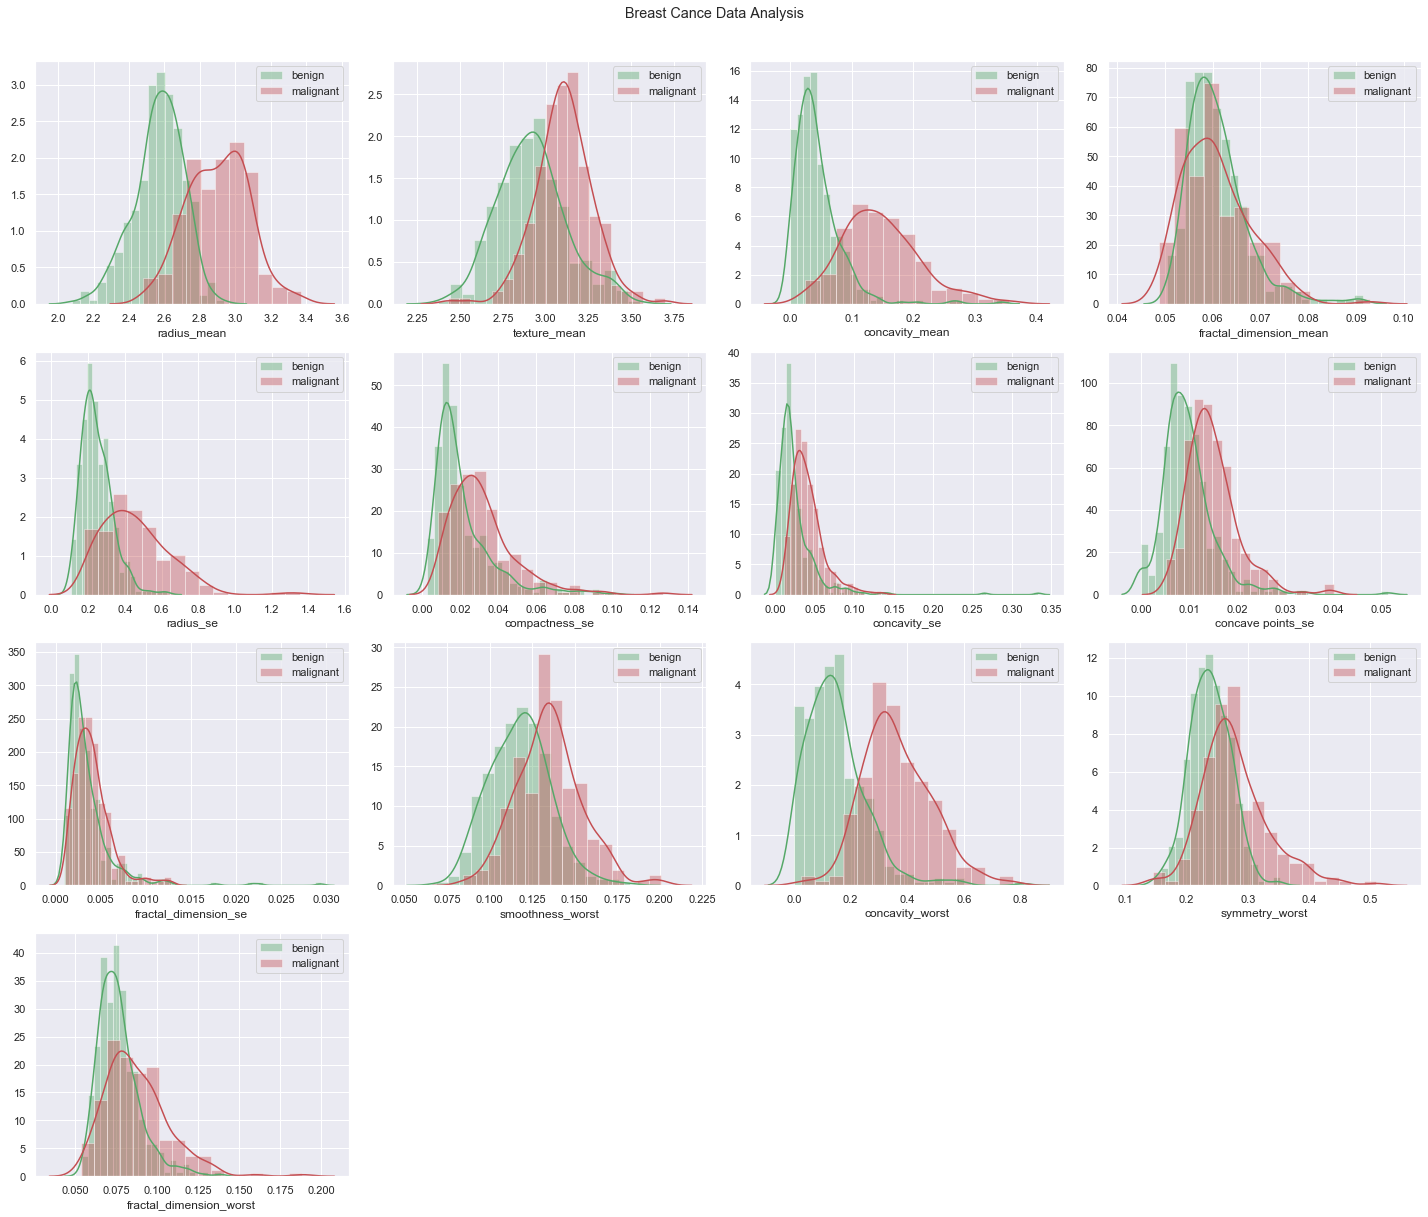

In [13]:
data=np.log(1+data)
fig = plt.figure(figsize = (20, 25))
j = 0
for i in data.columns:
    plt.subplot(6, 4,j+1)
    j += 1
    sns.distplot(data[i][result['diagnosis']==0], color='g', label = 'benign')
    sns.distplot(data[i][result['diagnosis']==1], color='r', label = 'malignant')
    plt.legend(loc='best')
fig.suptitle('Breast Cance Data Analysis')
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.show()

In [14]:
x_train, x_test, y_train, y_test = train_test_split(data.values, result.values, test_size = 0.2)
svc=SVC() # The default kernel used by SVC is the gaussian kernel
svc.fit(x_train, y_train)
prediction = svc.predict(x_test)
clf=DecisionTreeClassifier()
clf.fit(x_train,y_train)
pred1=clf.predict(x_test)
lg=LogisticRegression()
lg.fit(x_train,y_train)
pred=lg.predict(x_test)
cm = confusion_matrix(y_test, prediction)
cm1= confusion_matrix(y_test,pred)
cm2=confusion_matrix(y_test,pred1)
sum = 0
sum1=0
sum2=0
for i in range(cm.shape[0]):
    sum += cm[i][i]
    sum1+=cm1[i][i]
    sum2+=cm2[i][i]
    
accuracy = sum/x_test.shape[0]
acc=sum1/x_test.shape[0]
acc1=sum2/x_test.shape[0]
print("SVC Accuracy:", accuracy)

SVC Accuracy: 0.9298245614035088


In [15]:
print("Logistic Regression Accuracy: ", acc)

Logistic Regression Accuracy:  0.9122807017543859


In [16]:
print("Decision Tree Accuracy: ",acc1)

Decision Tree Accuracy:  0.9298245614035088


# Checking if data is balanced or imbalanced

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


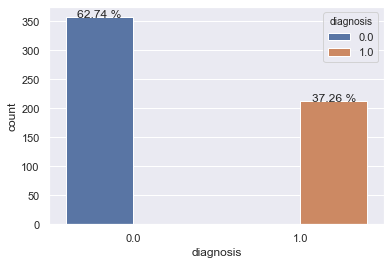

In [23]:
ax=sns.countplot(x="diagnosis",data=result,hue="diagnosis")
total=len(result)
for p in ax.patches:
    height=p.get_height()
    ax.text(p.get_x()+p.get_width()/2,
            height,
            "{0:.2f} %".format((height/total)*100),
           ha="center")

In [26]:
result["diagnosis"].value_counts(normalize=True)*100

0.0    62.741652
1.0    37.258348
Name: diagnosis, dtype: float64

Hence the given data is little bit imbalanced. Now we can't rely on accuracy for an error rate. Best way to find true error rate are Precision-recall score and F1 score

# Precision Score

In [27]:
from sklearn.metrics import precision_score
print("SVM", precision_score(y_test,prediction))

SVM 1.0


In [28]:
print("Logistic", precision_score(y_test,pred1))

Logistic 0.8666666666666667


In [29]:
print("Decision Tree", precision_score(y_test,pred))

Decision Tree 1.0


In [30]:
from sklearn.ensemble import RandomForestClassifier
raf=RandomForestClassifier(n_estimators=5000)
raf.fit(x_train,y_train)
raf_pred=raf.predict(x_test)
print("Random Forest",precision_score(y_test,raf_pred))

Random Forest 0.975


In [31]:
import xgboost as xgb

In [32]:
xgc=xgb.XGBClassifier(n_estimators=800)
xgc.fit(x_train,y_train)
xgc_pred=xgc.predict(x_test)
print("XGboost",precision_score(y_test,xgc_pred))

XGboost 0.9523809523809523


# Recall Score

In [33]:
from sklearn.metrics import recall_score
print("SVM", recall_score(y_test,prediction))

SVM 0.8048780487804879


In [34]:
print("Logistic Regression", recall_score(y_test,pred1))

Logistic Regression 0.9512195121951219


In [35]:
print("Decision Tree", recall_score(y_test,pred))

Decision Tree 0.7560975609756098


In [36]:
print("Random Forest", recall_score(y_test,raf_pred))

Random Forest 0.9512195121951219


In [37]:
print("xgb", recall_score(y_test,xgc_pred))

xgb 0.975609756097561


# F1-Score

In [38]:
from sklearn.metrics import f1_score
print("SVM", f1_score(y_test,prediction))

SVM 0.8918918918918919


In [39]:
print("Logistic Regression", f1_score(y_test,pred1))

Logistic Regression 0.9069767441860465


In [40]:
print("Decision Tree", f1_score(y_test,pred))

Decision Tree 0.8611111111111112


In [41]:
print("Random Forest", f1_score(y_test,raf_pred))

Random Forest 0.9629629629629629


In [42]:
print("xgb", f1_score(y_test,xgc_pred))

xgb 0.963855421686747


# Observations